In [1]:
from cylp.cy import CyClpSimplex
from cylp.py.modeling.CyLPModel import CyLPArray

import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


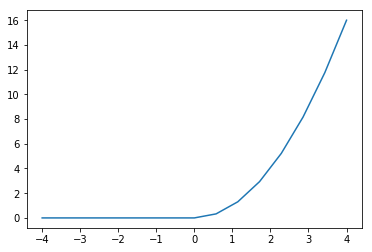

In [3]:
n = 15
a0, b0 = -4, 4
x = np.linspace(a0,b0,n)
y = np.piecewise(x, [x <= 0, x > 0], 
                [0, lambda x: x**2])
plt.plot(x,y)

In [5]:
x_1 = x[:-1:]
x_2 = x[1::]
y_1 = y[:-1:]
y_2 = y[1::]

In [32]:
a = (y_1-y_2)
a = np.matrix(a.reshape(-1,1))
a

matrix([[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.32653061],
        [-0.97959184],
        [-1.63265306],
        [-2.28571429],
        [-2.93877551],
        [-3.59183673],
        [-4.24489796]])

In [10]:
b = (x_2-x_1)
b = np.matrix(b)
b

matrix([[0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
         0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
         0.57142857, 0.57142857, 0.57142857, 0.57142857]])

In [27]:
c = x_1*y_2 - x_2*y_1
c = np.matrix(c.reshape(-1,1))
c

matrix([[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.        ],
        [ 0.        ],
        [ 0.37317784],
        [ 1.11953353],
        [ 2.23906706],
        [ 3.73177843],
        [ 5.59766764],
        [ 7.83673469]])

In [77]:
def plppd(a,b,c,x):
    x0 = 0.5
    u0 = np.matrix(np.zeros(n-1))
    u0[0,7] = 1.75
    print(u0)

    s = CyClpSimplex()
    y = s.addVariable('y',2)
    u = s.addVariable('u',n-1)
    
    b = b.reshape(-1,1)
    bp = np.hstack([b,np.zeros_like(b)])
    bp = np.matrix(bp)
    
    s += y + (c + a*x0)*u + (a*x)*u0 - (a*x0)*u0 == 0
    print (s.constraints)
    #s += y + (c + a*x)*u == 0
    s += bp*y >= -a*x - c
    s += b*u <= 1
    
    for i in range(n-1):
        s += u[i] >= 0

    
    s.optimizationDirection = 'max'
    s.objectiveCoefficients = y[0]
    s.primal()
    
    return s.objectiveValue, s.primalConstraintSolution, s.primalVariableSolution
plppd(a,b,c,3)

[[0.   0.   0.   0.   0.   0.   0.   1.75 0.   0.   0.   0.   0.   0.  ]]
[
constraint R_786:
variable names:
['u', 'y']
coefficients:
{u[2:16]: CyLPArray([ 0.        ,  0.        ,  0.        ,  0.        ,
            0.        ,  0.        ,  0.        , -0.16326531,
           -0.11661808,  0.303207  ,  1.09620991,  2.26239067,
            3.80174927,  5.71428571]), y: <2x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>}
lower = [0. 0.]
upper = [0. 0.]
normal Constarint
]


(0.2857142857142856,
 {'R_786': array([0., 0.]),
  'R_787': array([0.16326531, 0.16326531, 0.16326531, 0.16326531, 0.16326531,
         0.16326531, 0.16326531, 0.16326531, 0.16326531, 0.16326531,
         0.16326531, 0.16326531, 0.16326531, 0.16326531]),
  'R_788': array([1.])},
 {'y': array([0.28571429, 0.28571429]),
  'u': array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.75, 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  ])})